In [1]:
import os
import json
from collections import defaultdict

# Function to extract values from args.json and stats.json
def get_train_log_and_acc(root_folder):
    grouped_data = defaultdict(list)

    # Traverse through the root folder and all its subfolders
    for subdir, _, files in os.walk(root_folder):
        if 'args.json' in files and 'stats.json' in files:
            args_file = os.path.join(subdir, 'args.json')
            stats_file = os.path.join(subdir, 'stats.json')

            # Read args.json and get the value of "train_log_path"
            with open(args_file, 'r') as f:
                args_data = json.load(f)
                train_log_path = args_data.get('train_log_path')

            # Read stats.json and get the value of "acc"
            with open(stats_file, 'r') as f:
                stats_data = json.load(f)
                acc_value = stats_data.get('acc')

            # Group by train_log_path and collect all acc values
            if train_log_path is not None and acc_value is not None:
                grouped_data[train_log_path].append(acc_value)

    return grouped_data

# Specify the root folder (test_out directory)
root_folder = '/ceph/tsesterh/abstraction/regal_program_learning/test_out/date'

# Get the grouped data
grouped_data = get_train_log_and_acc(root_folder)

# Print the results grouped by train_log_path
for train_log_path, acc_values in grouped_data.items():
    print(f'Train Log Path: {train_log_path}')
    print(f'Accuracy values: {acc_values}')

Train Log Path: /ceph/tsesterh/abstraction/regal_program_learning/data/test_runs_release/date/date_gpt35_main_agent_round1_new_12_seed
Accuracy values: [0.6055555555555555, 0.6333333333333333, 0.6055555555555555, 0.6555555555555556, 0.4166666666666667, 0.6333333333333333]
Train Log Path: /ceph/tsesterh/abstraction/regal_program_learning
Accuracy values: [0.7444444444444445, 0.7277777777777777, 0.7444444444444445]


{'/ceph/tsesterh/abstraction/regal_program_learning/data/test_runs_release/date/date_gpt35_main_agent_round1_new_12_seed': 0.5916666666666667, '/ceph/tsesterh/abstraction/regal_program_learning': 0.7388888888888889}


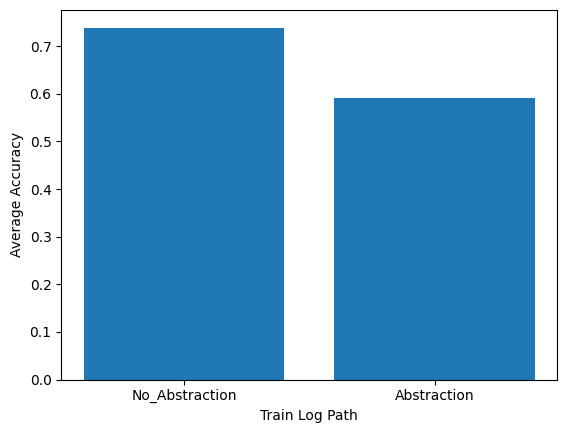

In [2]:
# make a barplot comparing the different train_log_paths. Each bar should represent the average accuracy of the different runs

import matplotlib.pyplot as plt

# Calculate the average accuracy for each train_log_path

avg_acc_values = {train_log_path: sum(acc_values) / len(acc_values) for train_log_path, acc_values in grouped_data.items()}
print(avg_acc_values)

# Plot the barplot
keys = ["No_Abstraction", "Abstraction"]

values = avg_acc_values.values()

#reverse the values list
values = list(values)
values.reverse()

plt.bar(keys, values)
plt.ylabel('Average Accuracy')
plt.xlabel('Train Log Path')
#plt.xticks(rotation=90)

plt.show()



In [2]:
import json
import re
from collections import defaultdict

# Define the Python functions to search for
functions = [
    "subtract_months", "subtract_days", "format_date", "get_formatted_date", "get_date_yesterday",
    "get_date_today", "get_date_one_week_from_today", "get_date_one_year_ago", "subtract_month", 
    "add_day", "subtract_day", "get_date_one_week_ago", "get_date_tomorrow", "get_date_24h_later", 
    "get_date_five_years_later", "get_date_of_nth_weekday", "get_date_ten_years_later", "get_date_x_days_ago"
]

# Initialize a dictionary to hold function counts
function_counts = defaultdict(int)

# Load the JSONL file
with open('/ceph/tsesterh/abstraction/regal_program_learning/test_out/date/exp_06_09_2024_19_46_use_abstraction_41_seed/test_incorrect.jsonl', 'r') as file:
    for line in file:
        # Parse each line as a JSON object (a dictionary)
        entry = json.loads(line)
        
        # Access the "program" field from the JSON object
        program = entry.get("program", "")
        
        # Count occurrences of each function in the program code
        for function in functions:
            function_counts[function] += len(re.findall(rf"\b{function}\b", program))

# Display the result
for function, count in function_counts.items():
    print(f"{function}: {count}")

subtract_months: 1
subtract_days: 0
format_date: 1
get_formatted_date: 1
get_date_yesterday: 0
get_date_today: 0
get_date_one_week_from_today: 1
get_date_one_year_ago: 0
subtract_month: 0
add_day: 1
subtract_day: 1
get_date_one_week_ago: 1
get_date_tomorrow: 0
get_date_24h_later: 1
get_date_five_years_later: 0
get_date_of_nth_weekday: 0
get_date_ten_years_later: 1
get_date_x_days_ago: 0


In [ ]:
text = "[INST] Your task is to draw simple figures using python Turtle graphics. \nYou will use a custom turtle library, similar to the built-in library, which is sufficient for all tasks. \n\nHere\'s a description of the custom library: \n- forward(x): move forward x pixels\n- left(theta): rotate left by theta degrees\n- right(theta): rotate right by theta degrees\n- penup(): stop drawing\n- pendown(): start drawing\n- teleport(x, y, theta): move to position (x, y) with angle theta\n- heading(): get the current angle of the turtle \n- isdown(): check if the pen is down\n- embed(program, local_vars): runs the code in program using the current context and teleports back to the original position. Allows you to nest programs. Implementationally, embed gets the turtle state (is_down, x, y, heading), executes program, then returns to the original state.\n- save(path): save the picture to file \n\nYou can also choose from the following helper functions: \ndef draw_small_5gon():\n\n    for i in range(5):\n        forward(2)\n        left(72.0)\n\ndef draw_step():\n\n    forward(2)\n    left(90.0)\n    forward(2)\n    left(90.0)\n    forward(0)\n    left(180.0)\n\ndef draw_small_6gon():\n\n    for i in range(6):\n        forward(2)\n        left(60.0)\n\ndef draw_small_triangle():\n\n    for i in range(3):\n        forward(2)\n        left(120.0)\n\ndef draw_small_7gon():\n\n    for i in range(7):\n        forward(2)\n        left(51.42857142857143)\n\ndef draw_semicircle():\n\n    for i in range(HALF_INF):\n        forward(EPS_DIST * 2)\n        left(EPS_ANGLE)\n\ndef draw_small_circle():\n\n    for i in range(HALF_INF):\n        forward(EPS_DIST * 1)\n        left(EPS_ANGLE)\n    for i in range(HALF_INF):\n        forward(EPS_DIST * 1)\n        left(EPS_ANGLE)\n\ndef draw_medium_5gon():\n\n    for i in range(5):\n        forward(4)\n        left(72.0)\n\ndef draw_small_8gon():\n\n    for i in range(8):\n        forward(2)\n        left(45.0)\n\ndef draw_small_line():\n\n    forward(2)\n    left(0.0)\n\ndef draw_medium_triangle():\n\n    for i in range(3):\n        forward(4)\n        left(120.0)\n\ndef draw_small_9gon():\n\n    for i in range(9):\n        forward(2)\n        left(40.0)\n\ndef draw_medium_square():\n\n    for i in range(4):\n        forward(4)\n        left(90.0)\n\ndef draw_medium_semicircle():\n\n    for i in range(HALF_INF):\n        forward(EPS_DIST * 2)\n        left(EPS_ANGLE)\n\ndef draw_7gon():\n\n    for i in range(7):\n        forward(2)\n        left(51.42857142857143)\n\ndef draw_small_5gon_with_space():\n\n    draw_small_5gon()\n    penup()\n    forward(2)\n    left(0.0)\n    pendown()\n\n.\n\nYou will be given a query and have to produce a program. Begin with a comment that explains your reasoning. For example, you might write\n# Thought: the query asks for a line, so I will use the forward() function. \n[/INST]\n[PYTHON]\n# Examples:\n\n# Query: a greek spiral with 6 turns\n# Program:\nfor i in range(7):\n    forward(1*i)\n    left(90.0)\n\n# Query: a 7 stepped staircase\n# Program:\nfor i in range(7):\n    forward(2)\n    left(90.0)\n\n    forward(2)\n    left(90.0)\n\n    forward(0)\n    left(180.0)\n\n# Query: 7 concentric circle s\n# Program:\nfor j in range(8):\n    for i in range(HALF_INF):\n        forward(EPS_DIST*j)\n        left(EPS_ANGLE)\n    for i in range(HALF_INF):\n        forward(EPS_DIST*j)\n        left(EPS_ANGLE)\n\n# Query: 7 sided snowflake with a medium semicircle and a small semicircle as arms\n# Thought: The query asked for 7 sided snowflake with a medium semicircle and a small semicircle as arms so I will use the helper functions: embed\n# Program:\nfor j in range(7):\n    embed("""penup()\nforward(2)\nleft(0.0)\n\npendown()\nfor i in range(HALF_INF):\n    forward(EPS_DIST*2)\n    left(EPS_ANGLE)\npenup()\nforward(2)\nleft(0.0)\n\npendown()\nfor i in range(HALF_INF):\n    forward(EPS_DIST*1)\n    left(EPS_ANGLE)""", locals())\n    forward(0)\n    left(51.42857142857143)\n\n# Query: 7 sided snowflake with a small square and a medium circle as arms\n# Thought: The query asked for 7 sided snowflake with a small square and a medium circle as arms so I will use the helper functions: embed\n# Program:\nfor j in range(7):\n    embed("""penup()\nforward(2)\nleft(0.0)\n\npendown()\nfor i in range(4):\n    forward(2)\n    left(90.0)\npenup()\nforward(2)\nleft(0.0)\n\npendown()\nfor i in range(HALF_INF):\n    forward(EPS_DIST*2)\n    left(EPS_ANGLE)\nfor i in range(HALF_INF):\n    forward(EPS_DIST*2)\n    left(EPS_ANGLE)""", locals())\n    forward(0)\n    left(51.42857142857143)\n\n# Query: 6 medium circle s in a row\n# Thought: The query asked for 6 medium circle s in a row so I will use the helper functions: embed\n# Program:\nfor j in range(6):\n    embed("""for i in range(HALF_INF):\n    forward(EPS_DIST*2)\n    left(EPS_ANGLE)\nfor i in range(HALF_INF):\n    forward(EPS_DIST*2)\n    left(EPS_ANGLE)""", locals())\n    penup()\n    forward(2)\n    left(0.0)\n\n    pendown()\n\n# Query: 7 sided snowflake with a small 7 gon as arms\n# Thought: The query asked for 7 sided snowflake with a small 7 gon as arms so I will use the helper functions: embed\n# Program:\nfor j in range(7):\n    embed("""for i in range(7):\n    forward(2)\n    left(51.42857142857143)""", locals())\n    forward(0)\n    left(51.42857142857143)\n\n# Query: a 4 stepped zigzag\n# Program:\nforward(0)\nleft(45.0)\n\nfor i in range(4):\n    forward(2)\n    left(90.0)\n\n    forward(2)\n    left(180.0 + 90.0)\n\n# Query: 7 sided snowflake with a medium line and a small semicircle as arms\n# Thought: The query asked for 7 sided snowflake with a medium line and a small semicircle as arms so I will use the helper functions: embed\n# Program:\nfor j in range(7):\n    embed("""forward(8)\nleft(0.0)\nfor i in range(HALF_INF):\n    forward(EPS_DIST*1)\n    left(EPS_ANGLE)""", locals())\n    forward(0)\n    left(51.42857142857143)\n\n# Query: 8 sided snowflake with a short line and a small 7 gon as arms\n# Thought: The query asked for 8 sided snowflake with a short line and a small 7 gon as arms so I will use the helper functions: embed\n# Program:\nfor j in range(8):\n    embed("""forward(4)\nleft(0.0)\nfor i in range(7):\n    forward(2)\n    left(51.42857142857143)""", locals())\n    forward(0)\n    left(45.0)\n\n[/PYTHON]\n[INST]\nPlease generate ONLY the code to produce the answer and nothing else.\n[/INST]\n[PYTHON]\n# Query: a greek spiral with 7 turns\n# Thought:"